## <center>Elements Of Data Science - F2024</center>
# <center>Week 11: Clustering, Recommendation Systems and Imbalanced Classes<center>
### <center>12/02/2024</center>

# TODOs

- Readings:
  - PDSH: [Chap 3.11 Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
  - PDSH: [Chap 5.06 Example: Predicting Bicycle Traffic](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic)
  - Optional: Python for Data Analysis: [Chap 11: Time Series](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d1605925%26site%3dehost-live%26scope%3dsite&ebv=EB&ppid=pp_317)
  - Optional: PML: [Chap 9: Embedding a Machine Learning Model into a Web Application](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3de025xna%26AN%3d1606531%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_281)
  
<br>

- **Quiz 10: due  Monday Dec 9th, 11:59pm ET**
<br>

- **HW4: due Monday Dec 16th 11:59pm ET**


# Today

- **Clustering**
- **Recommendation Systems**
- **Imbalanced Data**

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [2]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

# Clustering
<br>

- Can we group our data based on the features alone?
<br><br>
- **Unsupervised:** There is no label/target $y$
- Use similarity to group $X$ into $k$ clusters

### Why do Clustering?

- Exploratory data analysis
- Group media: images, music, news articles,...
- Group people: social network
- Science applications: gene families, psychological groups,...
- Image segmentation: group pixels, regions, ...
- ...



# Clustering Methods

  - **k-Means**
  - **Heirarchical Agglomerative Clustering**
  - Spectral Clustering
  - DBScan
  - ...

# Clustering: $k$-Means
<br>

- Not to be confused with k-NN!

- Idea:
  - Finds $k$ points in space as cluster centers (means)
  - Assigns datapoints to their closest cluster mean
  
  
- Need to specify the number of clusters $k$ up front
- sklearn uses euclidean distance to judge similarity

- make the similarity of the Kmeans
first choose k inital means randomly
assign each data point to the nearest mean
update the mean of each cluster to the mean of the data points in that cluster
repeat until convergence

# $k$-Means: How it works



```
FIRST: choose initial k points (means), randomly.

A: fix means -> assign all datapoints to their closest mean

B: fix cluster assignments -> recalculate means

RETURN TO A and Repeat until convergence!
```

# $k$-Means: How it works

In [3]:

from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif')


# Load Example Data

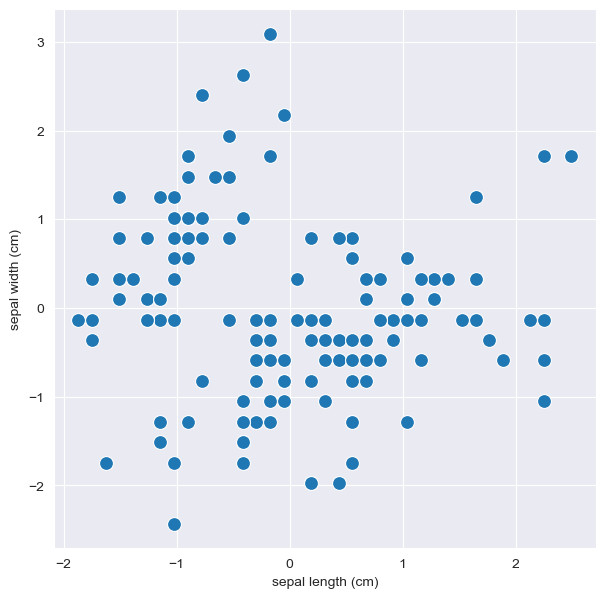

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data[:,:2])
X_iris = pd.DataFrame(X_iris,columns=iris.feature_names[:2])

fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=X_iris,s=100);

# KMeans in sklearn

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', random_state=0) # default init=k-means++

c = km.fit_predict(X_iris)

In [6]:
# cluster assignments
tmp = X_iris.copy()
tmp['cluster_assignments'] = c
tmp.sample(5,random_state=0).round(2)

,sepal length (cm),sepal width (cm),cluster_assignments
114,-0.05,-0.59,1
62,0.19,-1.97,1
33,-0.42,2.63,0
107,1.77,-0.36,1
7,-1.02,0.79,0


In [7]:
# cluster centers
km.cluster_centers_.round(2)

array([[-0.98,  0.9 ],
       [ 0.49, -0.45]])

# Plotting clusters and centers

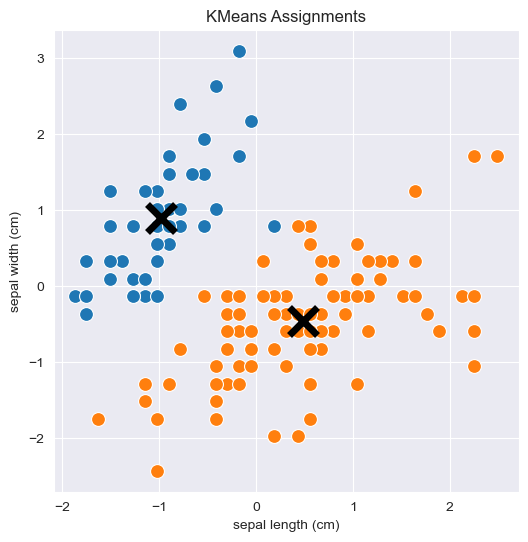

In [8]:
def plot_clusters(X,c=None,km=None,title=None,ax=None,marker_size=100):
    '''Plot data colored by cluster assignment'''
    _,ax = plt.subplots(1,1,figsize=(6,6)) if ax is None else (None,ax)
    c = km.fit_predict(X) if c is None else c
    for i in range(np.max(c)+1):
        sns.scatterplot(x=X.loc[c == i].iloc[:,0],y=X.loc[c == i].iloc[:,1],s=marker_size,ax=ax);
        if km:
            ax.plot(km.cluster_centers_[i,0],km.cluster_centers_[i,1], marker='x',c='k', ms=20, mew=5)
    ax.set_title(title)
        
plot_clusters(X_iris,km=km,title="KMeans Assignments")

In [9]:
ax

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

In [10]:
_,ax if ax is not None else plt.subplots(1,1,figsize=(6,6))

(<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>)

# Plotting clusters and centers

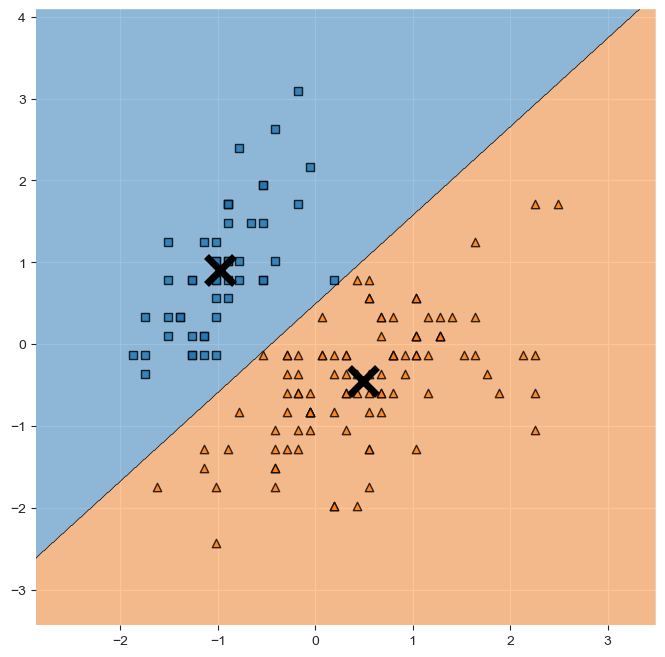

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plot_decision_regions(X_iris.values,km.predict(X_iris),km,ax=ax,legend=None);
for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5);

# K-Means: How good are the clusters?

- One way: **Within Cluster Sum of Squared Distances (SSD)**
- How close is every point to it's assigned cluster center?
<br>
    $SSD = \Large \sum_{k=1}^{K} \sum_{x_i\in C_k} \mid\mid x_i-\mu_k\mid\mid_2^2$

    where $\mid\mid x - \mu \mid\mid_2 = \sqrt{\sum_{j=1}^d (x_j - \mu_j)^2}$
<br>
- If this is high, items in cluster are far from their means.
- If this is low, items in cluster are close to their means.

In [12]:
# SSD stored in KMeans as `.inertia_`
round(km.inertia_,2)

166.95

# KMeans in Action

In [13]:
Image(url='https://dashee87.github.io/images/kmeans.gif')


From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# Things you need to define for KMeans

- number of clusters $k$ or `n_clusters`
- initial locations of means
  - random
  - k-means++ (pick starting points far apart from each other)

# How to choose $k$ or `n_clusters`?
<br>

- One way: use "elbow" in SSD or `KMeans.inertia_`
- "elbow" is where SSD ceases to drop rapidly

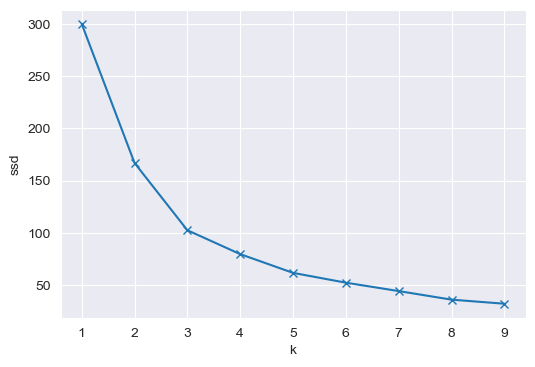

In [14]:
ssd = []
for i in range(1,10):
    ssd.append(KMeans(n_clusters=i).fit(X_iris).inertia_)
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(range(1,10),ssd,marker='x'); 
ax.set_xlabel('k');ax.set_ylabel('ssd');

- Question: What value $k$ will minimize SSD?

# Refitting with k=3

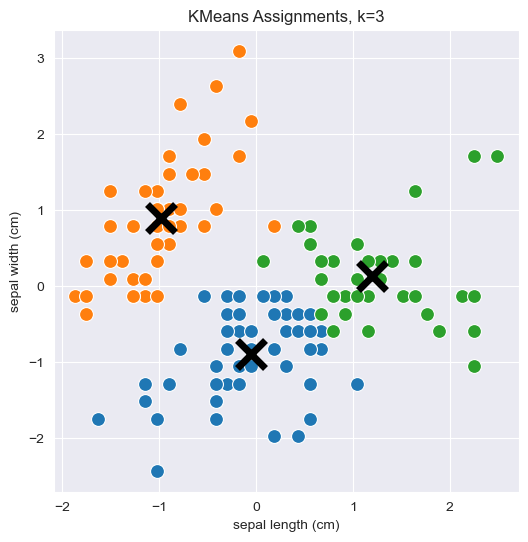

In [15]:
plot_clusters(X_iris,km=KMeans(n_clusters=3,random_state=0),title="KMeans Assignments, k=3")

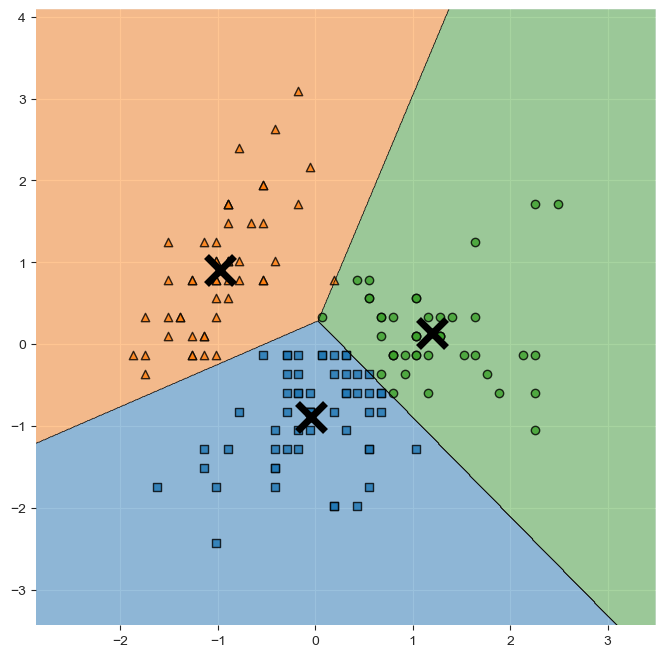

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
km = KMeans(n_clusters=3,random_state=0).fit(X_iris)
plot_decision_regions(X_iris.values,km.predict(X_iris),km,ax=ax,legend=None);
for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5);

## KMeans: Another Example

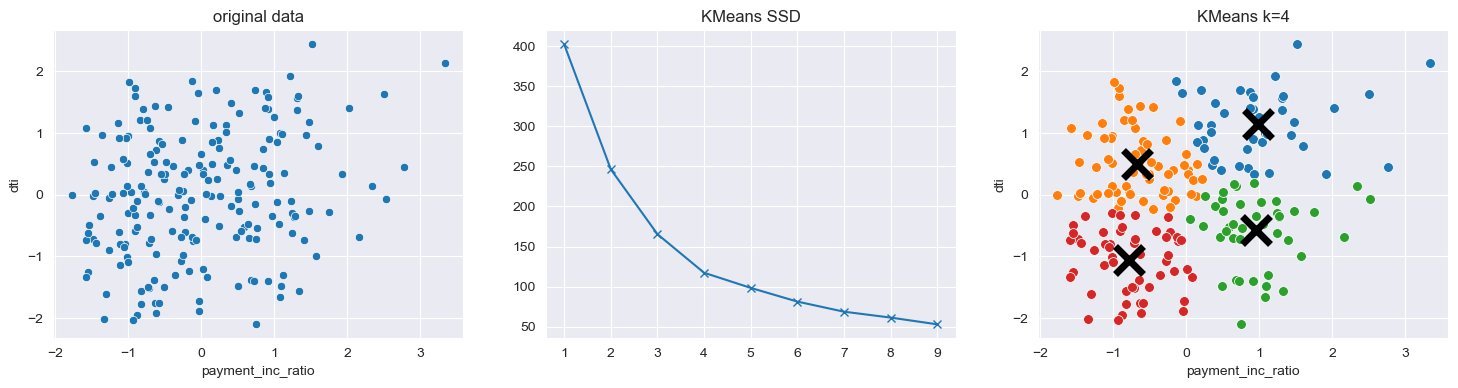

In [17]:
# loading and plotting the data
data = pd.read_csv('../data/loan200.csv')[['payment_inc_ratio','dti']]
from sklearn.preprocessing import StandardScaler
X_loan = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)

fig,ax = plt.subplots(1,3,figsize=(18,4))
sns.scatterplot(x=X_loan.iloc[:,0],y=X_loan.iloc[:,1],ax=ax[0]); 
ax[0].set_title('original data');

ssd = [KMeans(n_clusters=i).fit(X_loan).inertia_ for i in range(1,10)]
ax[1].plot(range(1,10),ssd,marker='x');
ax[1].set_title('KMeans SSD');

plot_clusters(X_loan,km=KMeans(n_clusters=4, random_state=0),title='KMeans k=4',marker_size=50,ax=ax[2])

# KMeans: Synthetic Example

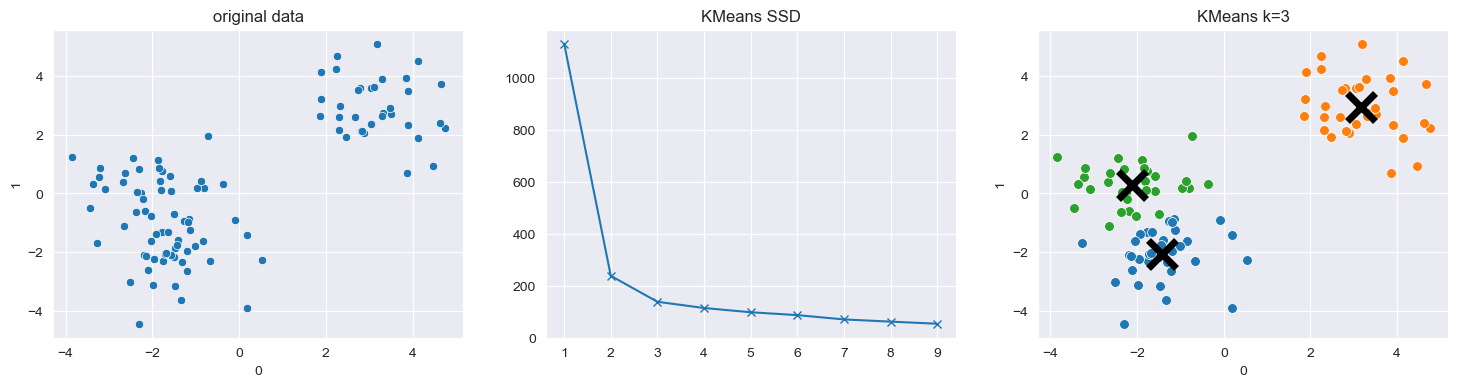

In [18]:
from sklearn.datasets import make_blobs
X_blobs,y_blobs = make_blobs(centers=[(3,3),(-2,0),(-2,-2)],random_state=1)
X_blobs = pd.DataFrame(X_blobs)

fig,ax = plt.subplots(1,3,figsize=(18,4))

sns.scatterplot(x=X_blobs.iloc[:,0],y=X_blobs.iloc[:,1],ax=ax[0]); 
ax[0].set_title('original data');

ssd = [KMeans(n_clusters=i).fit(X_blobs).inertia_ for i in range(1,10)]
ax[1].plot(range(1,10),ssd,marker='x');
ax[1].set_title('KMeans SSD')

plot_clusters(X_blobs,km=KMeans(n_clusters=3, random_state=0),title='KMeans k=3',marker_size=50,ax=ax[2])

# Hierarchical Agglomerative Clustering (HAC)
<br>

- group clusters together from the bottom up
- don't have to specify number of clusters up front
- generates binary tree over data

# HAC: How it works
<br>

```
FIRST: every point is it's own cluster

A: Find pair of clusters that are "closest"

B: Merge into single cluster

GOTO A and Repeat till there is a single cluster
```

# HAC in Action

In [19]:
Image(url='https://dashee87.github.io/images/hierarch.gif')

From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# What is "close"?

- Need to define what we mean by "closeness" by choosing
  - distance metric (how to measure distance)
  - linkage criteria (how to compare clusters)

# Need to define: Distance Metric
<br>

- **Euclidean** : $\sqrt{\sum_{i=1}^n \left(a_i-b_i\right)^2}$
  - easy to use analyitically, sensitive to outliers
<br>
<br>

- **Manhattan** : $\sum_{i=1}^n \mid a_i - b_i \mid$
  - more difficult to use analytically, robust to outliers
<br>
<br>

- **Cosine** : $1 - \frac{\sum{a_i b_i}}{\| a_i \|_2 \| b_i \|_2}$ 
  - angle between vectors while ignoring their scale
<br>
<br>

- many more (see [https://numerics.mathdotnet.com/Distance.html](https://numerics.mathdotnet.com/Distance.html)

# Need to define: **Linkage**
<br>

<div align="center"><img src="images/hac_linkage.png" width="600px"></div>

**single** : shortest distance from item of one cluster to item of the other

**complete** : greatest distance from item of one cluster to item of the other

**average** : average distance of items in one cluster to items in the other

**ward** : minimize variance of clusters being merged (only euclidean metric)

# HAC in sklearn

In [20]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(linkage='single',     # ward by default
                              affinity='euclidean', # default
                              n_clusters=4)         # 2 by default
c_single = hac.fit_predict(X_iris)

# generate models and assignments for all linkages
models,assignments = [],[]
linkages = ['single','average','complete','ward']
for linkage in linkages:
    models.append(AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=3))
    assignments.append(models[-1].fit_predict(X_iris))
    
# plot on the next slide

# HAC in sklearn

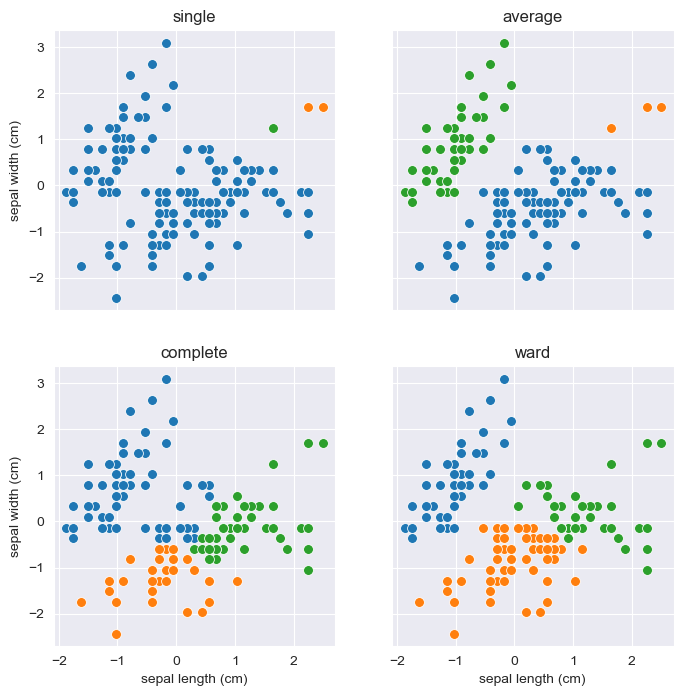

In [21]:
fig,ax = plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)
axs = ax.flatten()
for i in range(len(linkage)):
    plot_clusters(X_iris,c=assignments[i],title=linkages[i],ax=axs[i],marker_size=50)

# Clustering: Many Other Methods
<br>

<div align="center"><img src="images/sklearn_clustering_methods.png" width="1000px"></div>

From [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html_)

# How to evaluate clustering?
<br>

- **Within Cluster Sum of Squared Distances (SSD)**
- If we have labels:
  - **Homogeneity**: each cluster contains only members of a single class
  - **Completeness**: all members of a given class are assigned to the same cluster
  - **V-score**: harmonic mean of Homogeneity and Completeness
- Silhouette plots (see PML)
- many others ([see sklearn](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation]))

# Clustering Review

- k-Means
- Heirarchical Agglomerative Clustering
  - linkages
  - distance metrics
- Evaluating

<br>
<br>

# <center>Questions re Clustering?</center>
<br>
<br>

# Recommendation Engines
<br>

- Given a user and a set of items to recommend (or rank):
<br>
  
  - **Content-Based Filtering**: Recommend things **similar to the things I've liked**
  
  - **Collaborative Filtering**: Recommend things **that people with similar tastes have liked**
  
  - Hybrid/Ensemble
  
  - Recommendation as Classification


# Example: Housing Data

In [22]:
df_house = pd.read_csv('../data/house_sales_subset.csv')
df_house = df_house.iloc[:10].loc[:,['SqFtTotLiving','SqFtLot','AdjSalePrice']]
X_house_scaled = StandardScaler().fit_transform(df_house)
df_house_scaled = pd.DataFrame(X_house_scaled,columns=['SqFtTotLiving_scaled','SqFtLot_scaled','AdjSalePrice_scaled'])
df_house_scaled.head().round(2)

,SqFtTotLiving_scaled,SqFtLot_scaled,AdjSalePrice_scaled
0,0.40,-0.47,-0.70
1,2.03,0.65,2.48
2,-0.01,1.26,1.19
3,1.36,-0.54,-0.12
4,-0.41,-0.54,-0.71


# Content-Based Filtering
<br>

- Find **other things similar to the things I've liked**
- Assume: If I like product A, and product B is like product A, I'll like product B
- Use similarity of items
<br>

- Matrix: items x items
- Values: Similarity of items

# Calculate Distances

- to maximize similarity $\rightarrow$ minimize distance

In [23]:
# using euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

# calculate all pairwise distances between houses
dists = euclidean_distances(X_house_scaled)

np.round(dists,2)

array([[0.  , 3.74, 2.59, 1.12, 0.82, 2.01, 2.73, 0.87, 1.76, 0.84],
       [3.74, 0.  , 2.49, 2.94, 4.19, 4.78, 4.01, 3.79, 5.03, 3.44],
       [2.59, 2.49, 0.  , 2.61, 2.65, 3.25, 1.83, 2.07, 3.31, 2.01],
       [1.12, 2.94, 2.61, 0.  , 1.87, 2.83, 3.19, 1.76, 2.8 , 1.47],
       [0.82, 4.19, 2.65, 1.87, 0.  , 1.32, 2.69, 0.68, 0.97, 0.78],
       [2.01, 4.78, 3.25, 2.83, 1.32, 0.  , 3.59, 1.81, 0.87, 1.61],
       [2.73, 4.01, 1.83, 3.19, 2.69, 3.59, 0.  , 2.05, 3.2 , 2.51],
       [0.87, 3.79, 2.07, 1.76, 0.68, 1.81, 2.05, 0.  , 1.5 , 0.64],
       [1.76, 5.03, 3.31, 2.8 , 0.97, 0.87, 3.2 , 1.5 , 0.  , 1.61],
       [0.84, 3.44, 2.01, 1.47, 0.78, 1.61, 2.51, 0.64, 1.61, 0.  ]])

# Visualizing Distances With a Heatmap

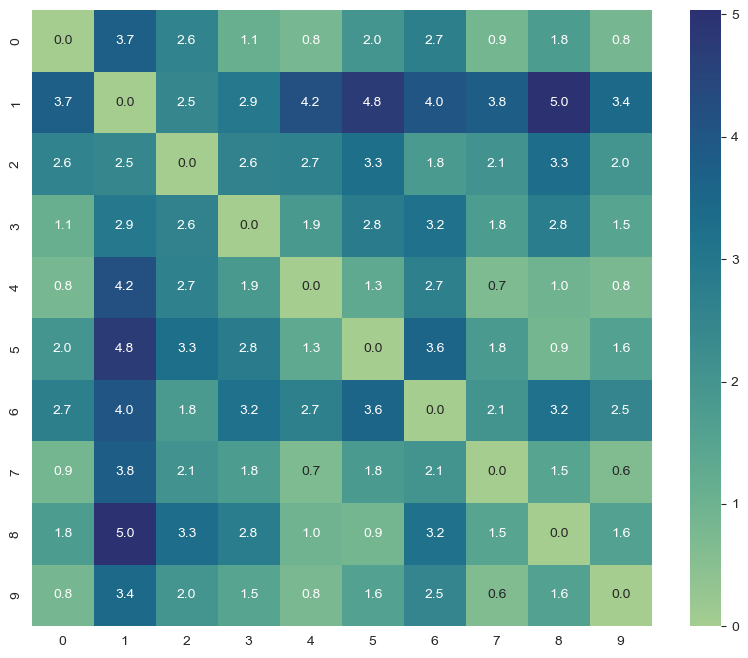

In [24]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(dists,annot=True,fmt=".1f",cmap='crest');

# Query For Similarity

- Imagine I like house 5
- What houses are similar to house 5?

In [25]:
query_idx = 5
df_house.iloc[query_idx]

SqFtTotLiving       930.0
SqFtLot            1012.0
AdjSalePrice     411781.0
Name: 5, dtype: float64

In [26]:
# Distances to house 5
[f'{x:0.1f}' for x in dists[query_idx]]

['2.0', '4.8', '3.3', '2.8', '1.3', '0.0', '3.6', '1.8', '0.9', '1.6']

# Query For Similarity Cont.


In [27]:
# find indexes of best scores (for distances, want ascending)
best_idxs_asc = np.argsort(dists[query_idx])
best_idxs_asc

array([5, 8, 4, 9, 7, 0, 3, 2, 6, 1])

In [28]:
# the top 10 recommendations with their distances
list(zip(['house '+str(x) for x in best_idxs_asc],
         np.round(dists[query_idx][best_idxs_asc],2)
        )
    )

[('house 5', 0.0),
 ('house 8', 0.87),
 ('house 4', 1.32),
 ('house 9', 1.61),
 ('house 7', 1.81),
 ('house 0', 2.01),
 ('house 3', 2.83),
 ('house 2', 3.25),
 ('house 6', 3.59),
 ('house 1', 4.78)]

# (User Based) Collaborative Filtering

- Recommend things **that people with similar tastes have liked**
- Assume: If both you and I like Movie A, and you like Movie B, I'll like movie B
- Use similarity of user preferences
<br>

- Matrix: Users x Items
- Values: Rankings

<div align="center"><img src="images/user-based_collaborative_filtering.png" width="400px"></div>

# Example: User Interests
<br>
Can we recommend topics based on a users existing interests?

In [29]:
# from Data Science from Scratch by Joel Grus
#https://github.com/joelgrus/data-science-from-scratch.git

users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [30]:
# interests of user0
sorted(users_interests[0])

['Big Data', 'Cassandra', 'HBase', 'Hadoop', 'Java', 'Spark', 'Storm']

# All Unique Interests

In [31]:
# get a sorted list of unique interests (here using set)
unique_interests = sorted({interest
                           for user_interests in users_interests
                           for interest in user_interests})

# the first 20 unique interests
unique_interests[:20]

['Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees']

# Transform User Interest Matrix

In [32]:
# Transform between lists of strings and fixed length lists of ints
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=unique_interests)

# a matrix of "user" rows and "interest" columns
user_interest_matrix = mlb.fit_transform(users_interests)

# The interests for user0
user_interest_matrix[0]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# transforming back from interest matrix to list of interests
mlb.inverse_transform(user_interest_matrix)[0]

('Big Data', 'Cassandra', 'HBase', 'Hadoop', 'Java', 'Spark', 'Storm')

# Calculate Similarity

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# using similarity, higher values are better
user_similarities = cosine_similarity(user_interest_matrix)

# what are the similarites for user0 to other users?
user_similarities[0].round(1)

array([1. , 0.3, 0. , 0. , 0. , 0.2, 0. , 0. , 0.2, 0.6, 0. , 0. , 0. ,
       0.2, 0. ])

In [35]:
# what users does user0 share interests with?
np.where(user_similarities[0])[0]

array([ 0,  1,  5,  8,  9, 13])

# Find Similar Users

In [36]:
# return a sorted list of users based on similarity
# skip query user and similarity == 0
def most_similar_users_to(query_idx):
    users_scores = [(idx,np.round(sim,2))
                    for idx,sim in enumerate(user_similarities[query_idx])
                    if idx != query_idx and sim > 0]
    return sorted(users_scores, key=lambda x:x[1])

pd.DataFrame(most_similar_users_to(0),columns=['user','similarity'])

,user,similarity
0,5,0.15
1,13,0.17
2,8,0.19
3,1,0.34
4,9,0.57


# Recommend Based On User Similarity

- Want to return items liked by other users sorted by the similarity of those users

In [37]:
from collections import defaultdict

def user_based_suggestions(user_idx):
    suggestions = defaultdict(float)
    
    # iterate over interests of similar users
    for other_idx, sim in most_similar_users_to(user_idx): # for each similar user
        for interest in users_interests[other_idx]:        #   for each interest of that user
            suggestions[interest] += sim                   #     add weight based on the similary of that user
            
    # sort suggestions based on weight
    suggestions = sorted(suggestions.items(),
                         key=lambda x:x[1],
                         reverse=True)
    
    # return only new interests
    return [(suggestion,weight.round(2))
            for suggestion,weight in suggestions
            if suggestion not in users_interests[user_idx]] # weed out existing interests

# Recommend Based On User Similarity

In [38]:
# reminder: original interests
users_interests[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [39]:
# top 5 new recommended interests
pd.DataFrame(user_based_suggestions(0)[:5],columns=['interest','weight'])

,interest,weight
0,MapReduce,0.57
1,Postgres,0.51
2,MongoDB,0.51
3,NoSQL,0.34
4,neural networks,0.19


# Issues with Collab. Filtering
<br>

- **the cold start problem** : What if it's your first time?
<br>

- **sparcity** : How to recommend movies no one's seen?

# Recommendation as Classification

- set1 features + set2 features -> label
- generate label based on history
- Examples
 - user + item -> purchased or not
 - candidate + job -> hired or not
 - ...
 
- Feature Engineering!

# Recommendation as Classification: Example

In [40]:
person_features = ['Age','Country','Interest']
book_features = ['Price','Language','Topic']

features = ['Person_Age',
            'Person_Country',
            'Person_Interest',
            'Book_Price',
            'Book_Language',
            'Book_Topic',
            'Interest_Topic_Match',
            'Country_Language_Match',
           ]

# target: "Did person purchase book? 1 == yes, 0 == no"

# dataset: Generate all person x book pairs and calculate target

# Recommendation as Classification: Prediction

# Issues with Recommendation as Classification
<br>

- Imbalanced classes
 - Example: each person bought different 1 of 100 books -> 1 pos to 99 neg
- False Negatives
 - Example: a person+book pair may be a good match even though it wasn't purchased

# Evaluating Recommendation Systems
<br>

- **Precision At K**: Out of top K, how many were true/good? `TP / K`
<br>

- **Recall At K**: Out of all true/good, how many were in top K? `TP / (TP+FN)`
<br>

- Surprise/Novelty?
<br>

- Diversity?

# Spotify's Recommendation Engine
<br>

[How Does Spotify Know You So Well?](https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe)
<br>

<div align="center"><img src="images/spotify.png" width="1000px"></div>

# Recommendation Engines Review

- Content-Based
- User-Based Collaborative Filtering
- Recommendation as Classification
- Issues
- Evaluating

<br>
<br>

# <center>Questions re Recommendation Engines?</center>
<br>
<br>

# Imbalanced Classes
<br>

- **Imbalanced classes**: 
  - when there is significantly more of one class than another in a classification task
<br>

- common in real world datasets
- Ex: credit card fraud
  - very small number of fraud transactions relative to total transactions

# Dealing With Imbalanced Classes

- Stratified Sampling
- Random Undersampling
- Random Oversampling
- Oversample Synthetic Minority Items
    - SMOTE
    - ADASYN
- Other methods

# Stratified Sampling

In [41]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(9)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1])

skf = StratifiedKFold(n_splits=3)
for train_idx, test_idx in skf.split(X, y):
    print(f"indices :  {train_idx} {test_idx}")
    print(f"values  :  {y[train_idx]} {y[test_idx]}")
    print()

indices :  [2 3 4 5 7 8] [0 1 6]
values  :  [0 0 0 0 1 1] [0 0 1]

indices :  [0 1 4 5 6 8] [2 3 7]
values  :  [0 0 0 0 1 1] [0 0 1]

indices :  [0 1 2 3 6 7] [4 5 8]
values  :  [0 0 0 0 1 1] [0 0 1]



# Random Sampling

- Randomly Oversample minority class 

- Randomly Undersample majority class 

# Example Dataset

In [42]:
from sklearn.datasets import make_classification
from collections import Counter
X_imb, y_imb = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3,
                                   n_clusters_per_class=1, weights=[0.01, 0.05, 0.94], class_sep=0.8, random_state=0)
df_imb = pd.DataFrame(X_imb); df_imb['y'] = y_imb; df_imb.y.value_counts()

y
2    4674
1     262
0      64
Name: count, dtype: int64

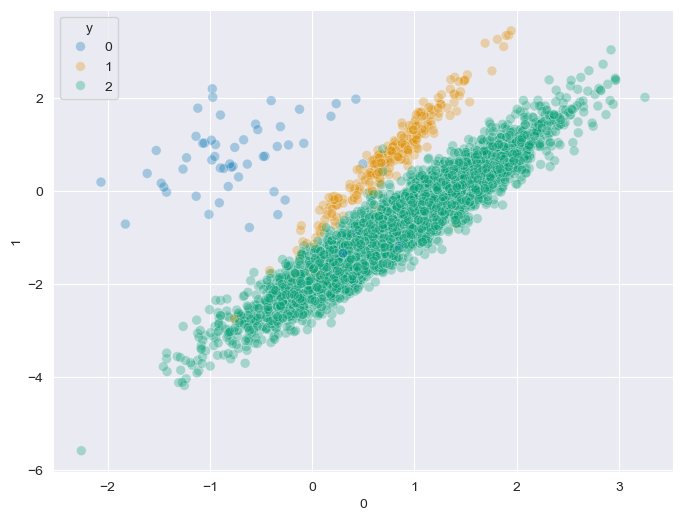

In [43]:
fig,ax=plt.subplots(1,1,figsize=(8,6)); sns.scatterplot(x=0,y=1,hue='y',data=df_imb,palette="colorblind",alpha=.3,s=50);

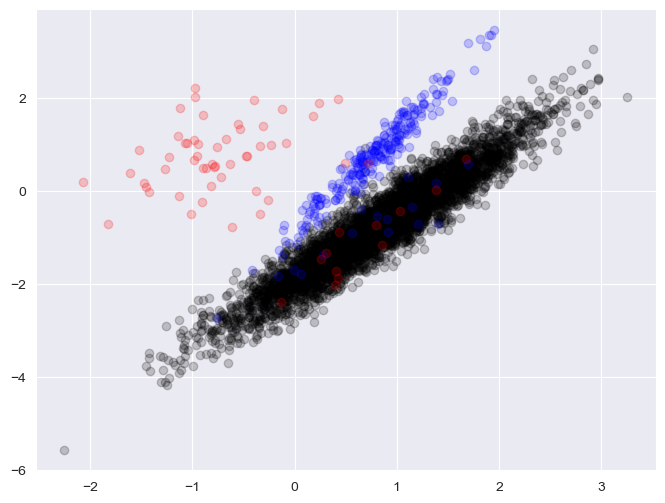

In [44]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_imb[y_imb==2,0],X_imb[y_imb==2,1],c='k', alpha=.2);
ax.scatter(X_imb[y_imb==1,0],X_imb[y_imb==1,1],c='b', alpha=.2);
ax.scatter(X_imb[y_imb==0,0],X_imb[y_imb==0,1],c='r', alpha=.2);

# Using imblearn

- `imblearn` is library created to deal with imbalanced classes
- need to install from `conda-forge` as `imbalanced-learn`
- import from `imblearn`

# Random Oversampling of minority class

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_imb, y_imb)
df_ros = pd.DataFrame(X_ros); df_ros['y'] = y_ros; df_ros.y.value_counts()

y
2    4674
1    4674
0    4674
Name: count, dtype: int64

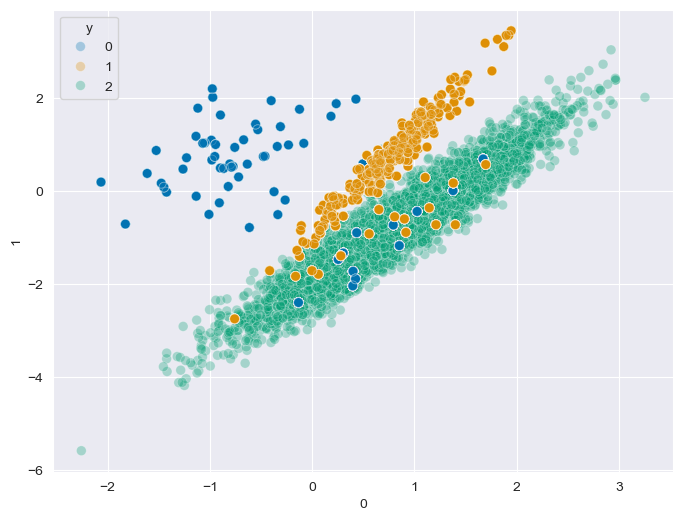

In [46]:
fig,ax=plt.subplots(1,1,figsize=(8,6)); sns.scatterplot(x=0,y=1,hue='y',data=df_ros,palette="colorblind",alpha=.3,s=50);

# Random Undersampling of majority class

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus, = rus.fit_resample(X_imb, y_imb)
df_rus = pd.DataFrame(X_rus); df_rus['y'] = y_rus; df_rus.y.value_counts()

y
0    64
1    64
2    64
Name: count, dtype: int64

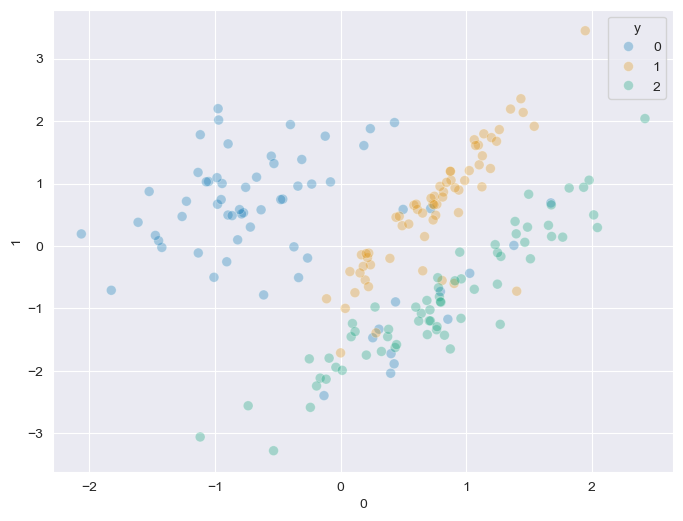

In [48]:
fig,ax=plt.subplots(1,1,figsize=(8,6)); sns.scatterplot(x=0,y=1,hue='y',data=df_rus,palette="colorblind",alpha=.3,s=50);

# Oversample Synthetic Minority Items

- SMOTE: Synthetic Minority Oversampling
- ADASYN: Adaptive Synthetic Minority Oversampling

# SMOTE: Synthetic Minority Oversampling

- Create new synthetic points between existing points

In [49]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_imb, y_imb)
df_smote = pd.DataFrame(X_smote); df_smote['y'] = y_smote; df_smote.y.value_counts()

y
2    4674
1    4674
0    4674
Name: count, dtype: int64

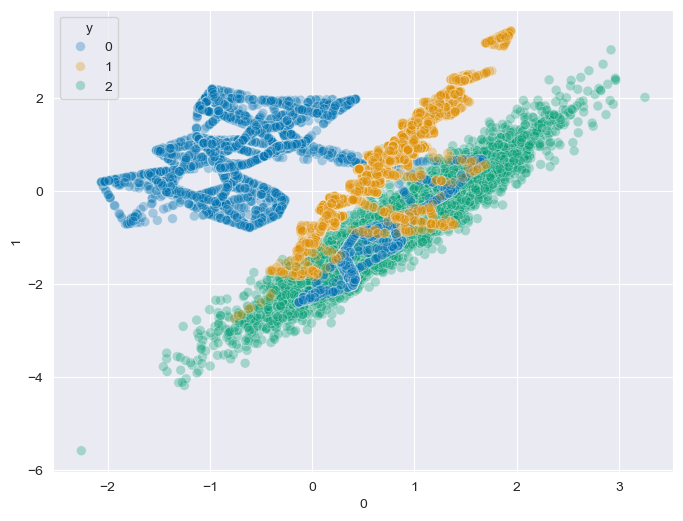

In [50]:
fig,ax=plt.subplots(1,1,figsize=(8,6)); sns.scatterplot(x=0,y=1,hue='y',data=df_smote,palette="colorblind",alpha=.3,s=50);

### ADASYN: Adaptive Synthetic Minority Oversampling

- Create new synthetic points between existing points *where classes overlap*

In [51]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_imb, y_imb)
df_adasyn = pd.DataFrame(X_adasyn); df_adasyn['y'] = y_adasyn; df_adasyn.y.value_counts()

y
2    4674
0    4673
1    4662
Name: count, dtype: int64

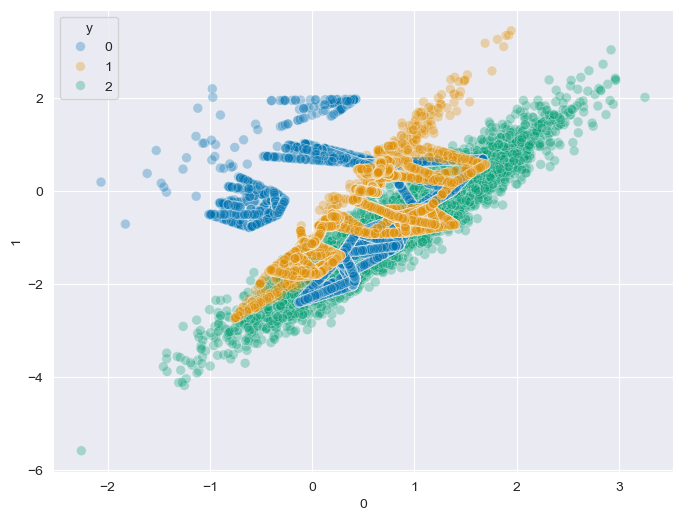

In [52]:
fig,ax=plt.subplots(1,1,figsize=(8,6)); sns.scatterplot(x=0,y=1,hue='y',data=df_adasyn,palette="colorblind",alpha=.3,s=50);

# Other methods for dealing with imbalanced classes
<br>

- Adjust class weight (sklearn)
- Adjust decision threshold (sklearn)
- Treat as anomaly detection
- Generate/buy more labels
<br>

- See https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

<br>
<br>

# <center>Questions re Imbalanced Classes?</center>
<br>
<br>